1. Importowanie bibliotek

In [3]:
#Importowanie potrzebnych blibliotek

import datetime
import scipy
import warnings
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from matplotlib.lines import Line2D
from matplotlib.patches import ConnectionPatch
from matplotlib.gridspec import GridSpec
from scipy.optimize import curve_fit
import seaborn as sns
warnings.filterwarnings("ignore")

from sklearn import metrics, linear_model
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict


2.1 Wczytywanie danych

In [2]:
df_flights = pd.read_csv('flights.csv', low_memory=False)
df_airports = pd.read_csv('airports.csv')
df_airlines = pd.read_csv('airlines.csv')

2.2 Sprawdzenie wymiarów naszych DF oraz wyświetlenie danych (tylko fragment)

In [3]:
print('Data Frame flight.csv dimensions:', df_flights.shape)
print('Data Frame airports.csv dimensions:', df_airports.shape)
print('Data Frame airlines.csv dimensions:', df_airlines.shape)

Data Frame flight.csv dimensions: (5819079, 31)
Data Frame airports.csv dimensions: (322, 7)
Data Frame airlines.csv dimensions: (14, 2)


In [4]:
df_airlines.head()

,IATA_CODE,AIRLINE
0,UA,United Air Lines Inc.
1,AA,American Airlines Inc.
2,US,US Airways Inc.
3,F9,Frontier Airlines Inc.
4,B6,JetBlue Airways


In [5]:
df_airports.head()

,IATA_CODE,AIRPORT,CITY,STATE,COUNTRY,LATITUDE,LONGITUDE
0,ABE,Lehigh Valley International Airport,Allentown,PA,USA,40.65236,-75.44040
1,ABI,Abilene Regional Airport,Abilene,TX,USA,32.41132,-99.68190
2,ABQ,Albuquerque International Sunport,Albuquerque,NM,USA,35.04022,-106.60919
3,ABR,Aberdeen Regional Airport,Aberdeen,SD,USA,45.44906,-98.42183
4,ABY,Southwest Georgia Regional Airport,Albany,GA,USA,31.53552,-84.19447


In [6]:
df_flights.head()

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,...,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
0,2015,1,1,4,AS,98,N407AS,ANC,SEA,5,...,408.0,-22.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
1,2015,1,1,4,AA,2336,N3KUAA,LAX,PBI,10,...,741.0,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
2,2015,1,1,4,US,840,N171US,SFO,CLT,20,...,811.0,5.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
3,2015,1,1,4,AA,258,N3HYAA,LAX,MIA,20,...,756.0,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,2015,1,1,4,AS,135,N527AS,SEA,ANC,25,...,259.0,-21.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
df_flights.dtypes

YEAR                     int64
MONTH                    int64
DAY                      int64
DAY_OF_WEEK              int64
AIRLINE                 object
FLIGHT_NUMBER            int64
TAIL_NUMBER             object
ORIGIN_AIRPORT          object
DESTINATION_AIRPORT     object
SCHEDULED_DEPARTURE      int64
DEPARTURE_TIME         float64
DEPARTURE_DELAY        float64
TAXI_OUT               float64
WHEELS_OFF             float64
SCHEDULED_TIME         float64
ELAPSED_TIME           float64
AIR_TIME               float64
DISTANCE                 int64
WHEELS_ON              float64
TAXI_IN                float64
SCHEDULED_ARRIVAL        int64
ARRIVAL_TIME           float64
ARRIVAL_DELAY          float64
DIVERTED                 int64
CANCELLED                int64
CANCELLATION_REASON     object
AIR_SYSTEM_DELAY       float64
SECURITY_DELAY         float64
AIRLINE_DELAY          float64
LATE_AIRCRAFT_DELAY    float64
WEATHER_DELAY          float64
dtype: object

In [8]:
df_flights.isnull().sum()

YEAR                         0
MONTH                        0
DAY                          0
DAY_OF_WEEK                  0
AIRLINE                      0
FLIGHT_NUMBER                0
TAIL_NUMBER              14721
ORIGIN_AIRPORT               0
DESTINATION_AIRPORT          0
SCHEDULED_DEPARTURE          0
DEPARTURE_TIME           86153
DEPARTURE_DELAY          86153
TAXI_OUT                 89047
WHEELS_OFF               89047
SCHEDULED_TIME               6
ELAPSED_TIME            105071
AIR_TIME                105071
DISTANCE                     0
WHEELS_ON                92513
TAXI_IN                  92513
SCHEDULED_ARRIVAL            0
ARRIVAL_TIME             92513
ARRIVAL_DELAY           105071
DIVERTED                     0
CANCELLED                    0
CANCELLATION_REASON    5729195
AIR_SYSTEM_DELAY       4755640
SECURITY_DELAY         4755640
AIRLINE_DELAY          4755640
LATE_AIRCRAFT_DELAY    4755640
WEATHER_DELAY          4755640
dtype: int64

3. Przetwarzanie danych

In [9]:
df_flights['DATE'] = pd.to_datetime(df_flights[['YEAR', 'MONTH', 'DAY']])

In [10]:
df_flights.head()

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,...,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY,DATE
0,2015,1,1,4,AS,98,N407AS,ANC,SEA,5,...,-22.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,2015-01-01
1,2015,1,1,4,AA,2336,N3KUAA,LAX,PBI,10,...,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,2015-01-01
2,2015,1,1,4,US,840,N171US,SFO,CLT,20,...,5.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,2015-01-01
3,2015,1,1,4,AA,258,N3HYAA,LAX,MIA,20,...,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,2015-01-01
4,2015,1,1,4,AS,135,N527AS,SEA,ANC,25,...,-21.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,2015-01-01


In [11]:
df_flights.dtypes

YEAR                            int64
MONTH                           int64
DAY                             int64
DAY_OF_WEEK                     int64
AIRLINE                        object
FLIGHT_NUMBER                   int64
TAIL_NUMBER                    object
ORIGIN_AIRPORT                 object
DESTINATION_AIRPORT            object
SCHEDULED_DEPARTURE             int64
DEPARTURE_TIME                float64
DEPARTURE_DELAY               float64
TAXI_OUT                      float64
WHEELS_OFF                    float64
SCHEDULED_TIME                float64
ELAPSED_TIME                  float64
AIR_TIME                      float64
DISTANCE                        int64
WHEELS_ON                     float64
TAXI_IN                       float64
SCHEDULED_ARRIVAL               int64
ARRIVAL_TIME                  float64
ARRIVAL_DELAY                 float64
DIVERTED                        int64
CANCELLED                       int64
CANCELLATION_REASON            object
AIR_SYSTEM_D

3.1 Funkcje zmieniające format daty i czasu planowanego wylotu w poszczególnych kolumnach

In [12]:

def format_here(chain):
    if pd.isnull(chain):
        return np.nan
    else:
        if isinstance(chain, datetime.time):
            return chain
        elif chain == 2400:
            chain = 0
        chain = "{0:04d}".format(int(chain))
        here = datetime.time(int(chain[0:2]), int(chain[2:4]))
        return here


def combine_date(date, time):
    if pd.isnull(date) or pd.isnull(time):
        return np.nan
    else:
        return datetime.datetime.combine(date, time)

def create_flight_time(df, col):    
    date_list = []
    for index, row in df.iterrows():
        date = row['DATE']
        time = row[col]

        if pd.isnull(time):
            date_list.append(np.nan)
        else:
            
            if isinstance(time, datetime.time) and time == datetime.time(0, 0):
                date += datetime.timedelta(days=1)
                time = datetime.time(0, 0)
            else:
                time = format_here(time)
            date_list.append(combine_date(date, time))
    
    return pd.Series(date_list)

In [13]:
df_flights['SCHEDULED_DEPARTURE'] = create_flight_time(df_flights, 'SCHEDULED_DEPARTURE')
df_flights['DEPARTURE_TIME'] = df_flights['DEPARTURE_TIME'].apply(format_here)
df_flights['SCHEDULED_ARRIVAL'] = df_flights['SCHEDULED_ARRIVAL'].apply(format_here)
df_flights['ARRIVAL_TIME'] = df_flights['ARRIVAL_TIME'].apply(format_here)

In [14]:
df_flights.loc[:5, ['SCHEDULED_DEPARTURE', 'SCHEDULED_ARRIVAL', 'DEPARTURE_TIME', 'ARRIVAL_TIME', 'DEPARTURE_DELAY', 'ARRIVAL_DELAY']]

,SCHEDULED_DEPARTURE,SCHEDULED_ARRIVAL,DEPARTURE_TIME,ARRIVAL_TIME,DEPARTURE_DELAY,ARRIVAL_DELAY
0,2015-01-01 00:05:00,04:30:00,23:54:00,04:08:00,-11.0,-22.0
1,2015-01-01 00:10:00,07:50:00,00:02:00,07:41:00,-8.0,-9.0
2,2015-01-01 00:20:00,08:06:00,00:18:00,08:11:00,-2.0,5.0
3,2015-01-01 00:20:00,08:05:00,00:15:00,07:56:00,-5.0,-9.0
4,2015-01-01 00:25:00,03:20:00,00:24:00,02:59:00,-1.0,-21.0
5,2015-01-01 00:25:00,06:02:00,00:20:00,06:10:00,-5.0,8.0


3.2 Decyzja o usunięcie niepotrzebnych kolumn.

In [15]:
columns_to_remove = ['TAXI_OUT', 'TAXI_IN', 'WHEELS_ON', 'WHEELS_OFF', 'YEAR', 
                       'MONTH','DAY','DAY_OF_WEEK','DATE', 'AIR_SYSTEM_DELAY',
                       'SECURITY_DELAY', 'AIRLINE_DELAY', 'LATE_AIRCRAFT_DELAY',
                       'WEATHER_DELAY', 'DIVERTED', 'CANCELLED', 'CANCELLATION_REASON',
                       'FLIGHT_NUMBER', 'TAIL_NUMBER', 'AIR_TIME']

df_flights.drop(columns_to_remove, axis=1, inplace=True)

df_flights = df_flights[['AIRLINE', 'ORIGIN_AIRPORT', 'DESTINATION_AIRPORT',
        'SCHEDULED_DEPARTURE', 'DEPARTURE_TIME', 'DEPARTURE_DELAY',
        'SCHEDULED_ARRIVAL', 'ARRIVAL_TIME', 'ARRIVAL_DELAY',
        'SCHEDULED_TIME', 'ELAPSED_TIME']]

df_flights[:5]

,AIRLINE,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,DEPARTURE_TIME,DEPARTURE_DELAY,SCHEDULED_ARRIVAL,ARRIVAL_TIME,ARRIVAL_DELAY,SCHEDULED_TIME,ELAPSED_TIME
0,AS,ANC,SEA,2015-01-01 00:05:00,23:54:00,-11.0,04:30:00,04:08:00,-22.0,205.0,194.0
1,AA,LAX,PBI,2015-01-01 00:10:00,00:02:00,-8.0,07:50:00,07:41:00,-9.0,280.0,279.0
2,US,SFO,CLT,2015-01-01 00:20:00,00:18:00,-2.0,08:06:00,08:11:00,5.0,286.0,293.0
3,AA,LAX,MIA,2015-01-01 00:20:00,00:15:00,-5.0,08:05:00,07:56:00,-9.0,285.0,281.0
4,AS,SEA,ANC,2015-01-01 00:25:00,00:24:00,-1.0,03:20:00,02:59:00,-21.0,235.0,215.0


3.3 Wypełnienie pustych wartości.

In [16]:
missing_df_flights = df_flights.isnull().sum(axis=0).reset_index()
missing_df_flights.columns = ['col_name', 'missing_values']

missing_df_flights['filling factor (%)'] = (df_flights.shape[0]-missing_df_flights['missing_values'])/df_flights.shape[0]*100
missing_df_flights.sort_values('filling factor (%)').reset_index(drop=True)

,col_name,missing_values,filling factor (%)
0,ARRIVAL_DELAY,105071,98.194371
1,ELAPSED_TIME,105071,98.194371
2,ARRIVAL_TIME,92513,98.410178
3,DEPARTURE_TIME,86153,98.519474
4,DEPARTURE_DELAY,86153,98.519474
5,SCHEDULED_TIME,6,99.999897
6,AIRLINE,0,100.000000
7,ORIGIN_AIRPORT,0,100.000000
8,DESTINATION_AIRPORT,0,100.000000
9,SCHEDULED_DEPARTURE,0,100.000000


In [17]:
airlines_companies = df_airlines.set_index('IATA_CODE')['AIRLINE'].to_dict()

In [18]:
def get_stats(group):
    return {'count': group.count(), 'min': group.min(),'mean': group.mean(), 'max': group.max()}


global_stats = df_flights['DEPARTURE_DELAY'].groupby(df_flights['AIRLINE']).apply(get_stats).unstack()
global_stats = global_stats.sort_values('count')
global_stats

,count,min,mean,max
AIRLINE,,,,
VX,61385.0,-24.0,9.022595,644.0
HA,76119.0,-27.0,0.485713,1433.0
F9,90290.0,-46.0,13.350858,1112.0
NK,115454.0,-37.0,15.944766,836.0
AS,171910.0,-82.0,1.785801,963.0
US,194825.0,-35.0,6.141137,759.0
B6,262843.0,-31.0,11.514353,1006.0
MQ,280282.0,-36.0,10.125188,1544.0
UA,509534.0,-40.0,14.435441,1314.0


In [19]:
df_flights_4_vis = df_flights.loc[:, ['AIRLINE', 'DEPARTURE_DELAY']]
df_flights_4_vis['AIRLINE'] = df_flights_4_vis['AIRLINE'].replace(airlines_companies)

4. Kilka wizualizacji

4.1 Wizualizacja opóźnienia wylotu z lotniska dla każdego lotu i linii lotniczych.

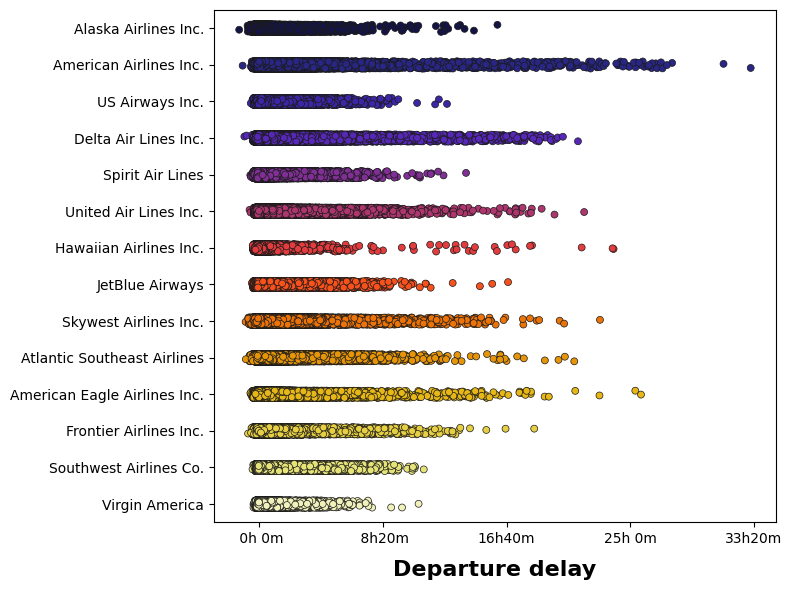

In [20]:
plt.figure(figsize=(8,6))
sns.color_palette(palette='CMRmap')
ax = sns.stripplot(data=df_flights_4_vis, x='DEPARTURE_DELAY', y='AIRLINE', palette='CMRmap', linewidth=0.5, jitter=True)
plt.setp(ax.get_xticklabels(), fontsize=10)
plt.setp(ax.get_yticklabels(), fontsize=10)
ax.set_xticklabels(['{:2.0f}h{:2.0f}m'.format(*[int(y) for y in divmod(x,60)]) for x in ax.get_xticks()])

plt.xlabel('Departure delay', fontsize=16, weight='bold', labelpad=10)
ax.yaxis.label.set_visible(False)
plt.tight_layout(w_pad=3)

4.2 Policzenie ilości lotów względem firmy lotniczej oraz kategoryzacja opóźnień t<5 | 5>t<45< | t>45

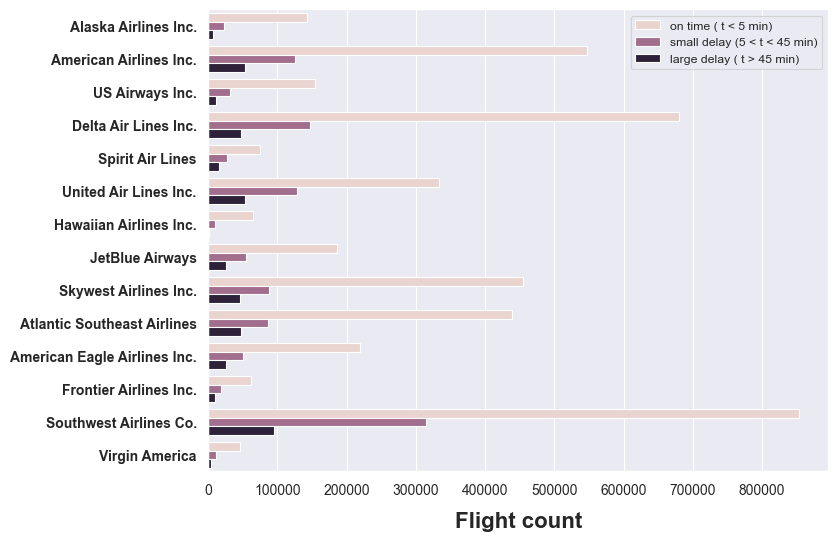

In [47]:
type_of_delay = lambda x:((0,1)[x > 5], 2)[x > 45]
df_flights['DELAY_LEVEL'] = df_flights['DEPARTURE_DELAY'].apply(type_of_delay)

fig = plt.figure(1, figsize=(8,6))
ax = sns.countplot(y='AIRLINE', hue='DELAY_LEVEL', data=df_flights)

labels = [airlines_companies[item.get_text()] for item in ax.get_yticklabels()]
ax.set_yticklabels(labels)
plt.setp(ax.get_xticklabels(), fontsize=10, weight='normal', rotation=0)
plt.setp(ax.get_yticklabels(), fontsize=10, weight='bold', rotation=0);
ax.yaxis.label.set_visible(False)
plt.xlabel('Flight count',  fontsize=16, weight = 'bold', labelpad=10)

L = plt.legend()
L.get_texts()[0].set_text('on time ( t < 5 min)')
L.get_texts()[1].set_text('small delay (5 < t < 45 min)')
L.get_texts()[2].set_text('large delay ( t > 45 min)')
plt.show()

4.4 Liczba opóźnień względem każdej linii dla wylotu z lotniska.

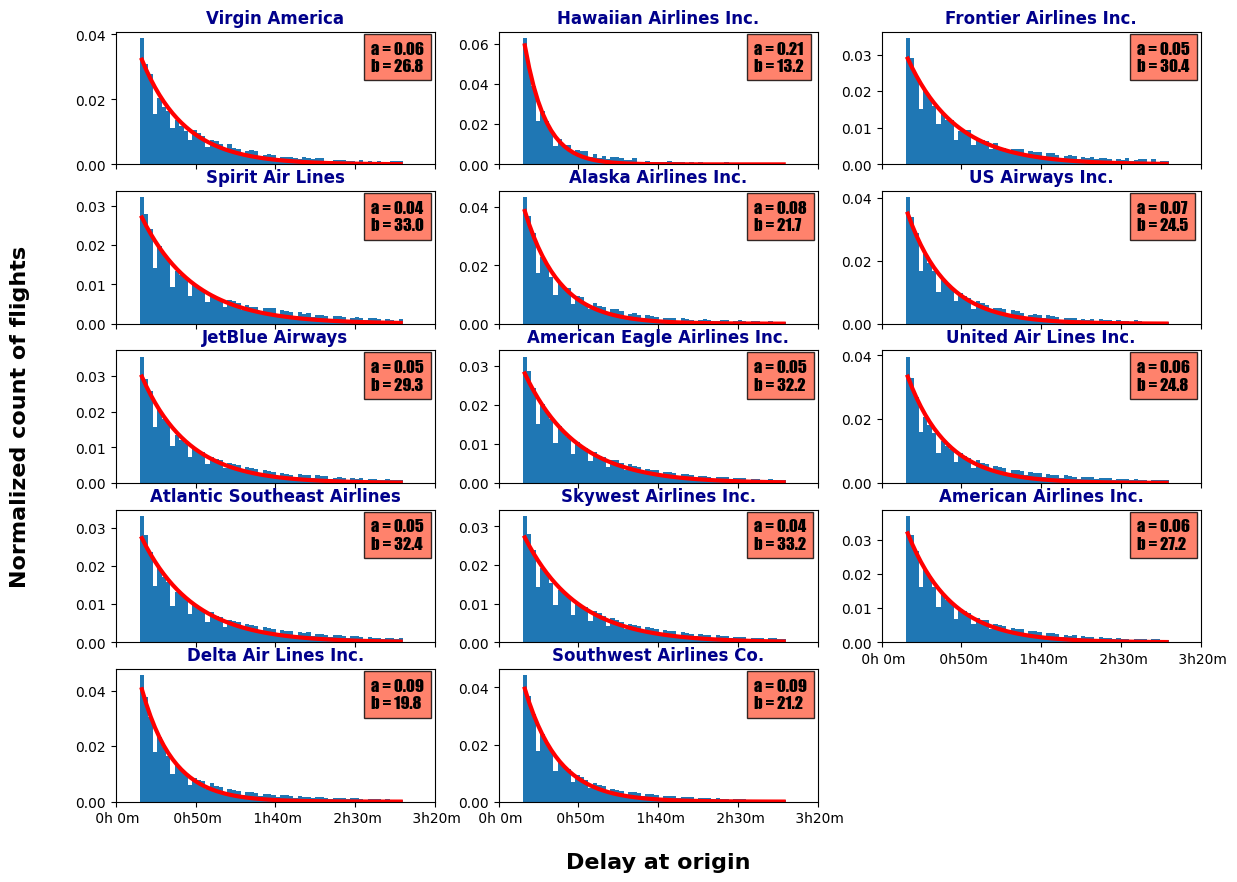

In [22]:
def func(x, a, b):
    return a * np.exp(-x/b)

points = [] ; label_company = []
fig = plt.figure(1, figsize=(14,10))
i = 0
for carrier_name in [airlines_companies[x] for x in global_stats.index]:
    i += 1
    ax = fig.add_subplot(5,3,i)    
    
    n, bins, patches = plt.hist(x = df_flights_4_vis[df_flights_4_vis['AIRLINE']==carrier_name]['DEPARTURE_DELAY'],
                                range = (15,180), density = True, bins = 60)
    bin_centers = bins[:-1] + 0.5 * (bins[1:] - bins[:-1])    
    popt, pcov = curve_fit(func, bin_centers, n, p0 = [1, 2])

    points.append(popt)
    label_company.append(carrier_name)
    
    plt.plot(bin_centers, func(bin_centers, *popt), 'r-', linewidth=3)    
    
    if i < 12:
        ax.set_xticks(ax.get_xticks())
        ax.set_xticklabels(['' for x in ax.get_xticks()])
    else:
        ax.set_xticks(ax.get_xticks())
        ax.set_xticklabels(['{:2.0f}h{:2.0f}m'.format(*[int(y) for y in divmod(x,60)])
                            for x in ax.get_xticks()])
    
    plt.title(carrier_name, fontsize = 12, fontweight = 'bold', color = 'darkblue')
    
    if i == 7:
        ax.text(-0.3,0.5,'Normalized count of flights', fontsize=16, weight='bold', rotation=90,
            color='k', horizontalalignment='center', verticalalignment='center', transform = ax.transAxes)
    if i == 14:
        ax.text( 0.5, -0.5 ,'Delay at origin', fontsize=16, weight='bold', rotation=0,
            color='k', horizontalalignment='center', transform = ax.transAxes)
    
    ax.text(0.8, 0.7, 'a = {}\nb = {}'.format(round(popt[0],2), round(popt[1],1)),
            style='italic', transform=ax.transAxes, fontsize = 12, family='fantasy',
            bbox={'facecolor':'tomato', 'alpha':0.8, 'pad':5})
    
plt.show()

4.5 Opóźnienie względem wylotu a przylotu

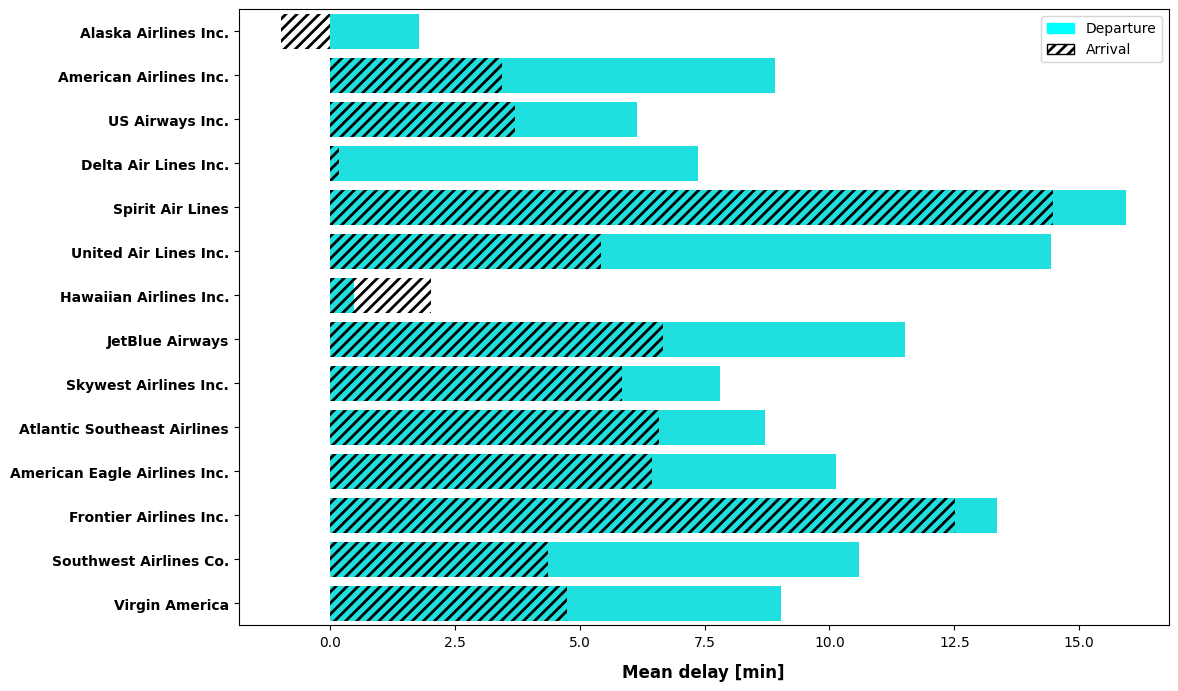

In [23]:

mpl.rcParams['hatch.linewidth'] = 2.0

fig = plt.figure(1, figsize=(12,8))
ax = sns.barplot(x='DEPARTURE_DELAY', y='AIRLINE', data=df_flights, color='aqua', errorbar=None)
ax = sns.barplot(x='ARRIVAL_DELAY', y='AIRLINE', data=df_flights, hatch='///', alpha=0.0, errorbar=None)

labels = [airlines_companies[item.get_text()] for item in ax.get_yticklabels()]
ax.set_yticklabels(labels, weight='bold')
ax.yaxis.label.set_visible(False)
plt.xlabel('Mean delay [min]', fontsize=12, weight='bold', labelpad=10)

departure_patch = mpatches.Patch(color='aqua', label='Departure')
arrival_patch = mpatches.Patch(facecolor='white', edgecolor='black', hatch='///', label='Arrival')

plt.legend(handles=[departure_patch, arrival_patch], loc='upper right', frameon=True)

plt.show()

Sprawdzenie ile jest lotnisk w naszych DF.

In [24]:
print("Airports: {}".format(len(df_flights['ORIGIN_AIRPORT'].unique())))

Airports: 628


In [25]:
origin_nb = dict()
for carrier in airlines_companies.keys():
    airport_origins_list = df_flights[df_flights['AIRLINE'] == carrier]['ORIGIN_AIRPORT'].unique()
    origin_nb[carrier] = len(airport_origins_list)

4.6 Liczba odwiedzonych lotnisk przez każdą linię lotniczą.

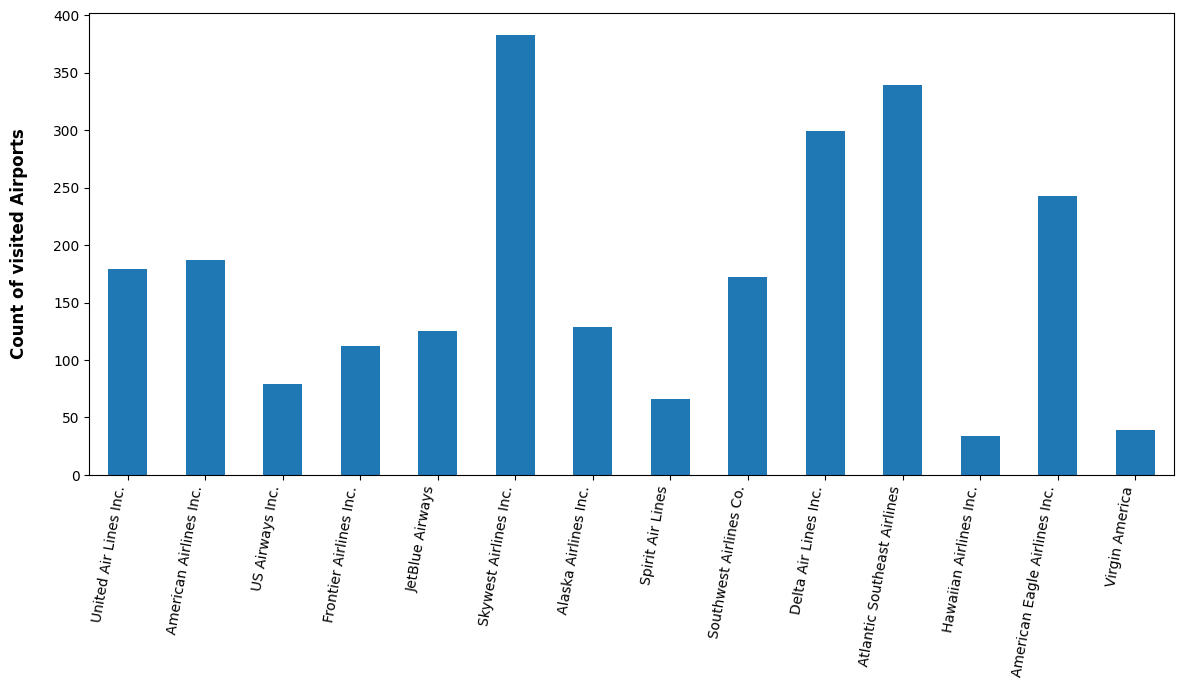

In [26]:
df_airports_4_vis = pd.DataFrame.from_dict(origin_nb, orient='index')
df_airports_4_vis.rename(columns= {0:'count'}, inplace=True) 
ax = df_airports_4_vis.plot(kind='bar', figsize=(14,6))
labels = [airlines_companies[item.get_text()] for item in ax.get_xticklabels()]
ax.set_xticklabels(labels)
plt.ylabel('Count of visited Airports', fontsize=12, weight='bold', labelpad=18)
plt.setp(ax.get_xticklabels(), fontsize=10, ha='right', rotation=80)
ax.legend().set_visible(False)
plt.show()

In [27]:
identify_airport = df_airports.set_index('IATA_CODE')['CITY'].to_dict()

airport_mean_delays = pd.DataFrame(pd.Series(df_flights['ORIGIN_AIRPORT'].unique()))
airport_mean_delays.set_index(0, drop=True, inplace=True)

for carrier in airlines_companies.keys():
    df_flights_airlines = df_flights[df_flights['AIRLINE'] == carrier]
    df_mean_t = df_flights_airlines['DEPARTURE_DELAY'].groupby(df_flights_airlines['ORIGIN_AIRPORT']).apply(get_stats).unstack()
    airport_mean_delays[carrier] = df_mean_t.loc[:, 'mean']


4.7 Wpływ opóźnień wylotu na lotniska.

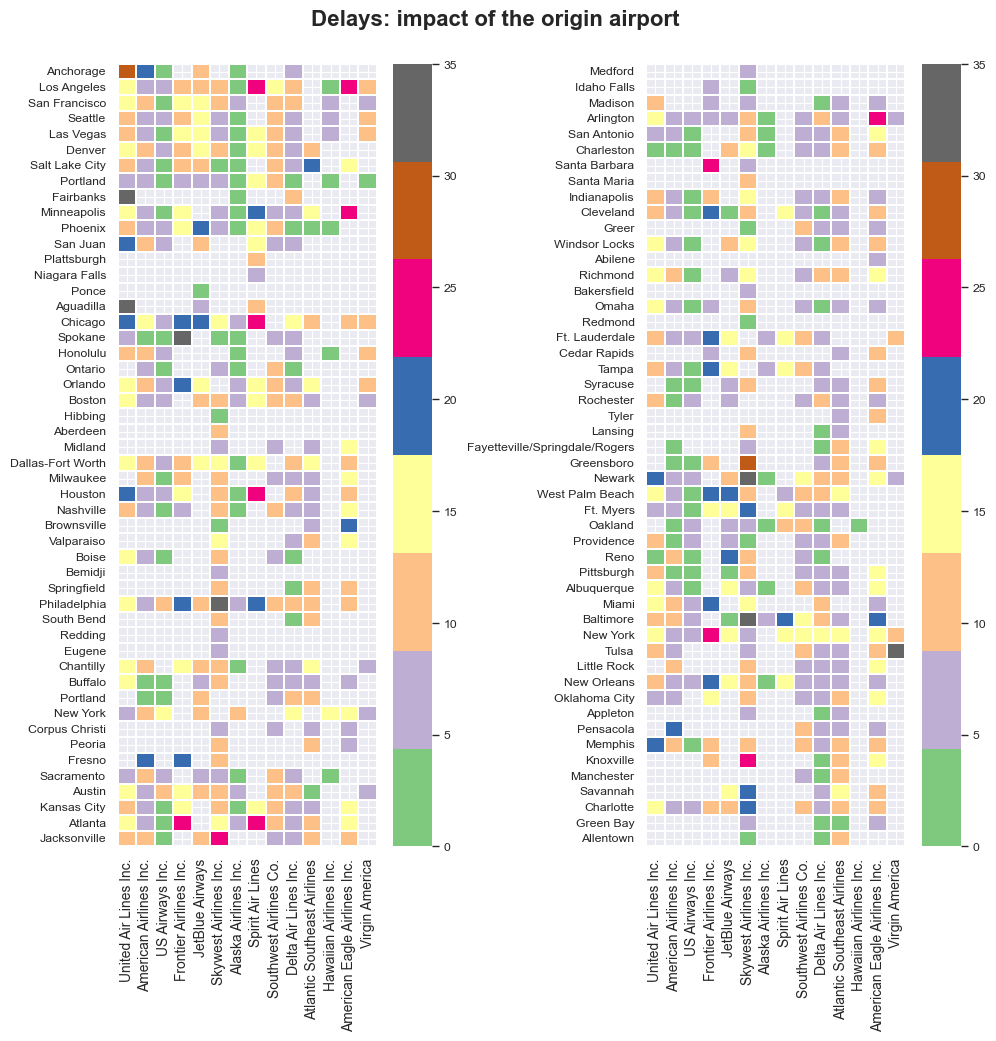

In [28]:
sns.set_theme(context='paper')
fig = plt.figure(1, figsize=(10,10))

ax = fig.add_subplot(1,2,1)
subset = airport_mean_delays.iloc[:50,:].rename(columns=airlines_companies)
subset = subset.rename(index = identify_airport)
mask = subset.isnull().to_numpy()
sns.heatmap(subset, linewidths=0.02, cmap='Accent', mask=mask, vmin= 0, vmax = 35)
plt.setp(ax.get_xticklabels(), fontsize=10, rotation=90)
ax.yaxis.label.set_visible(False)

ax = fig.add_subplot(1,2,2)
subset = airport_mean_delays.iloc[50:100,:].rename(columns=airlines_companies)
subset = subset.rename(index = identify_airport)
fig.text(0.5, 1.02, "Delays: impact of the origin airport", ha='center', fontsize=16, weight='bold')
mask = subset.isnull().to_numpy()
sns.heatmap(subset, linewidths=0.02, cmap='Accent', mask=mask, vmin= 0, vmax = 35)
plt.setp(ax.get_xticklabels(), fontsize=10, rotation=90)
ax.yaxis.label.set_visible(False)


plt.tight_layout()

5. Wyobrędnienie godzin przylotu oraz wylotu. Wyliczenie opóźnień.

In [29]:

df_2_temp = df_flights[df_flights['AIRLINE'] == carrier][['SCHEDULED_DEPARTURE', 'SCHEDULED_ARRIVAL', 'ORIGIN_AIRPORT', 'DESTINATION_AIRPORT', 'DEPARTURE_DELAY']]
df_2_temp.dropna(how='any', inplace=True)

df_2_temp['WEEKDAY'] = df_2_temp['SCHEDULED_DEPARTURE'].apply(lambda x: x.weekday())

df_2_temp['DEPARTURE_DELAY'] = df_2_temp['DEPARTURE_DELAY'].apply(lambda x: x if x < 60 else np.nan)
df_2_temp.dropna(how='any', inplace=True)

form_t = lambda x: x.hour * 3600 + x.minute * 60 + x.second
df_2_temp['H_O_D'] = df_2_temp['SCHEDULED_DEPARTURE'].apply(lambda x: form_t(x))
df_2_temp['H_O_A'] = df_2_temp['SCHEDULED_ARRIVAL'].apply(lambda x: form_t(x))

numeric_cols = ['H_O_D', 'H_O_A', 'DEPARTURE_DELAY', 'WEEKDAY']
df_2_temp[numeric_cols] = df_2_temp[numeric_cols].apply(pd.to_numeric, errors='coerce')

df_hours_oa = df_2_temp[['SCHEDULED_DEPARTURE','DEPARTURE_DELAY', 'WEEKDAY', 'H_O_D', 'H_O_A', 'ORIGIN_AIRPORT']].groupby(['H_O_D', 'H_O_A', 'ORIGIN_AIRPORT'], as_index=False).mean()

df_hours_oa[:5]

,H_O_D,H_O_A,ORIGIN_AIRPORT,SCHEDULED_DEPARTURE,DEPARTURE_DELAY,WEEKDAY
0,600,5100,LAX,2015-08-17 11:10:00,10.083333,2.500000
1,2100,7500,LAS,2015-08-18 00:35:00,-0.437500,2.750000
2,5400,22200,LAS,2015-12-18 17:30:00,-5.047619,2.666667
3,21600,25800,LAX,2015-08-17 11:20:00,-2.222222,1.777778
4,21600,26100,SFO,2015-08-17 11:20:00,-1.444444,1.777778


In [30]:
df_2_temp.head()

,SCHEDULED_DEPARTURE,SCHEDULED_ARRIVAL,ORIGIN_AIRPORT,DESTINATION_AIRPORT,DEPARTURE_DELAY,WEEKDAY,H_O_D,H_O_A
707,2015-01-01 06:45:00,08:05:00,SFO,LAX,-7.0,3,24300,29100
846,2015-01-01 07:00:00,10:25:00,JFK,LAX,-5.0,3,25200,37500
847,2015-01-01 07:00:00,08:25:00,LAS,SFO,-1.0,3,25200,30300
985,2015-01-01 07:05:00,15:34:00,SFO,JFK,-3.0,3,25500,56040
1246,2015-01-01 07:30:00,15:50:00,LAX,JFK,-2.0,3,27000,57000


In [31]:
df_2_temp.dtypes

SCHEDULED_DEPARTURE    datetime64[ns]
SCHEDULED_ARRIVAL              object
ORIGIN_AIRPORT                 object
DESTINATION_AIRPORT            object
DEPARTURE_DELAY               float64
WEEKDAY                         int64
H_O_D                           int64
H_O_A                           int64
dtype: object

5.1 Przygotowanie danych do modelu

In [32]:
label_encoder = LabelEncoder()
integer_encoded = label_encoder.fit_transform(df_hours_oa['ORIGIN_AIRPORT'])

zipped = zip(integer_encoded, df_hours_oa['ORIGIN_AIRPORT'])
label_airports = list(set(list(zipped)))
label_airports.sort(key = lambda x:x[0])

onehot_encoder = OneHotEncoder(sparse_output=False)
integer_encoded = integer_encoded.reshape(len(integer_encoded), 1)
onehot_encoded = onehot_encoder.fit_transform(integer_encoded)

b = np.array(df_hours_oa[['H_O_D', 'H_O_A']])
X = np.hstack((onehot_encoded, b))
Y = np.array(df_hours_oa['DEPARTURE_DELAY'])
Y = Y.reshape(len(Y), 1)


In [33]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.42)

In [34]:
lm = linear_model.LinearRegression()
model = lm.fit(X,Y)
predictions = lm.predict(X)
print("MSE =", metrics.mean_squared_error(predictions, Y))

MSE = 53.21046450930612


In [35]:
score_min = 10000
for pol_order in range(1, 3):
    for alpha in range(0, 20, 2):
        ridgereg = linear_model.Ridge(alpha = alpha/10)
        poly = PolynomialFeatures(degree = pol_order)
        regr = linear_model.LinearRegression()
        X_ = poly.fit_transform(X_train)
        ridgereg.fit(X_, Y_train)
        
        X_ = poly.fit_transform(X_test)
        result = ridgereg.predict(X_)
        score = metrics.mean_squared_error(result, Y_test)
        
        if score < score_min:
            score_min = score
            parameters = [alpha, pol_order]

        print("n={} alpha={} , MSE = {:<0.5}".format(pol_order, alpha/10, score))

n=1 alpha=0.0 , MSE = 5.7965e+04
n=1 alpha=0.2 , MSE = 47.947
n=1 alpha=0.4 , MSE = 47.914
n=1 alpha=0.6 , MSE = 47.886
n=1 alpha=0.8 , MSE = 47.864
n=1 alpha=1.0 , MSE = 47.844
n=1 alpha=1.2 , MSE = 47.828
n=1 alpha=1.4 , MSE = 47.813
n=1 alpha=1.6 , MSE = 47.8
n=1 alpha=1.8 , MSE = 47.788
n=2 alpha=0.0 , MSE = 2.9835e+17
n=2 alpha=0.2 , MSE = 54.75
n=2 alpha=0.4 , MSE = 53.075
n=2 alpha=0.6 , MSE = 52.149
n=2 alpha=0.8 , MSE = 51.556
n=2 alpha=1.0 , MSE = 51.142
n=2 alpha=1.2 , MSE = 50.835
n=2 alpha=1.4 , MSE = 50.6
n=2 alpha=1.6 , MSE = 50.413
n=2 alpha=1.8 , MSE = 50.262


In [36]:
ridgereg = linear_model.Ridge(alpha = parameters[0])
poly = PolynomialFeatures(degree = parameters[1])
X_ = poly.fit_transform(X)
ridgereg.fit(X_, Y)
result = ridgereg.predict(X_)
score = metrics.mean_squared_error(result, Y)        
print(f'MSE:{score}')

MSE:53.60934739292382


In [37]:
label_conversion = dict()
for s in label_airports:
    label_conversion[s[1]] = s[0]

df_hours_oa['ORIGIN_AIRPORT'].replace(label_conversion, inplace = True)

for index, label in label_airports:
    temp = df_hours_oa['ORIGIN_AIRPORT'] == index
    temp = temp.apply(lambda x:1.0 if x else 0.0)
    if index == 0:
        matrix = np.array(temp)
    else:
        matrix = np.vstack((matrix, temp))
matrix = matrix.T

b = np.array(df_hours_oa[['H_O_D', 'H_O_A']])
X_test = np.hstack((matrix, b))
Y_test = np.array(df_hours_oa['DEPARTURE_DELAY'])
Y_test = Y_test.reshape(len(Y_test), 1)

In [38]:
X_ = poly.fit_transform(X_test)
result = ridgereg.predict(X_)
score = metrics.mean_squared_error(result, Y_test)
print('MSE = {}'.format(round(score, 2)))

MSE = 53.61


In [39]:
label_conversion = dict()
for s in label_airports:
    label_conversion[s[1]] = s[0]

df_hours_oa['ORIGIN_AIRPORT'].replace(label_conversion, inplace = True)

for index, label in label_airports:
    temp = df_hours_oa['ORIGIN_AIRPORT'] == index
    temp = temp.apply(lambda x:1.0 if x else 0.0)
    if index == 0:
        matrix = np.array(temp)
    else:
        matrix = np.vstack((matrix, temp))
matrix = matrix.T

b = np.array(df_hours_oa[['H_O_D', 'H_O_A']])
X_test = np.hstack((matrix, b))
Y_test = np.array(df_hours_oa['DEPARTURE_DELAY'])
Y_test = Y_test.reshape(len(Y_test), 1)

In [40]:
X_ = poly.fit_transform(X_test)
result = ridgereg.predict(X_)
score = metrics.mean_squared_error(result, Y_test)
print('MSE = {}'.format(round(score, 2)))

MSE = 53.61


5.2 Pomyłka czasowa

In [46]:
'Ecart = {:.2f} min'.format(np.sqrt(score))

'Ecart = 7.32 min'

In [43]:
icount = 0
for i, val in enumerate(Y_test):
    if abs(val-predictions[i]) > 15: icount += 1
print("ecarts > 15 minutes: {}%".format(round((icount / len(predictions))*100,3)))

ecarts > 15 minutes: 4.305%


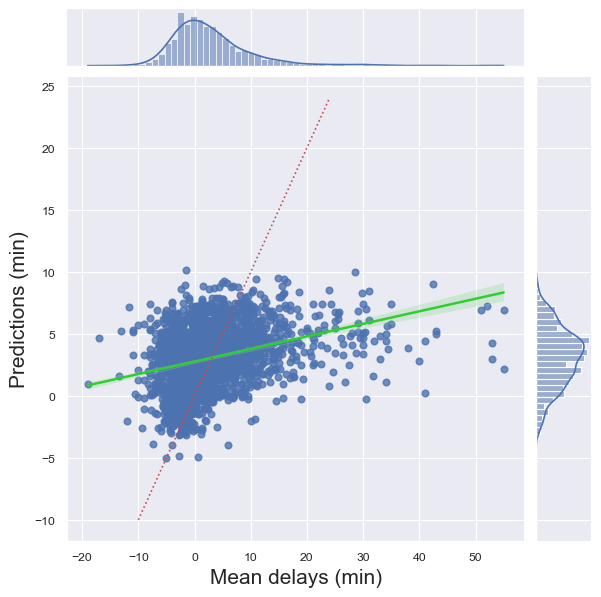

In [44]:
tips = pd.DataFrame()
tips["prediction"] = pd.Series([float(s) for s in predictions]) 
tips["original_data"] = pd.Series([float(s) for s in Y_test]) 
sns.jointplot(x="original_data", y="prediction", data=tips, height=6, ratio = 7,
              joint_kws={'line_kws':{'color':'limegreen'}}, kind='reg')
plt.xlabel('Mean delays (min)', fontsize = 15)
plt.ylabel('Predictions (min)', fontsize = 15)
plt.plot(list(range(-10,25)), list(range(-10,25)), linestyle = ':', color = 'r')
plt.show()